# Allometric scaling of grwith rate and body mass from Lync, et al. (2022)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.legend import Legend
# import seaborn as sns

In [2]:
from scipy.stats import spearmanr
from pylr2 import regress2
import statsmodels.api as sm

In [3]:
# %matplotlib notebook

In [4]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 11,
    'boxplot.medianprops.linewidth': 2,
    'boxplot.flierprops.markeredgecolor': 'none',
    'boxplot.flierprops.markersize': 5})

Load data

In [5]:
# df = pd.read_table('lynch_data_prokaryotes.txt', sep = '\t', 
#                    header = None, names = ['cell_size', 'max_growth_rate'])

In [6]:
df = pd.read_table('lynch_data_prokaryotes_auto.txt', sep = '\t',
                   header = None, names = ['cell_size', 'max_growth_rate'])

In [7]:
df.set_index(np.arange(len(df)), inplace = True)

In [8]:
for x in ['cell_size', 'max_growth_rate']:
    df[f'log_{x}'] = np.log10(df[x])

Add column for heterotrophs and cyanobacteria

In [9]:
df['type'] = df.index.map(lambda x: 'phototroph' if x <= 24 else 'heterotroph')

## Linear regressions

In [10]:
heterotrophs = df.query('type == "heterotroph"')
phototrophs = df.query('type == "phototroph"')

In [11]:
x_hetero = sm.add_constant(heterotrophs['log_cell_size'])
y_hetero = heterotrophs['log_max_growth_rate']
reg_hetero = sm.OLS(y_hetero, x_hetero).fit()
intercept_hetero, slope_hetero = reg_hetero.params
x_hetero_ = np.linspace(heterotrophs['log_cell_size'].min(), heterotrophs['log_cell_size'].max(), heterotrophs['log_cell_size'].shape[0])
y_pred_hetero = reg_hetero.get_prediction(sm.add_constant(x_hetero_))

In [12]:
pr_hetero = spearmanr(heterotrophs['log_cell_size'], heterotrophs['log_max_growth_rate'])

In [13]:
reg_hetero.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     log_max_growth_rate   R-squared:                       0.121
Model:                             OLS   Adj. R-squared:                  0.113
Method:                  Least Squares   F-statistic:                     15.90
Date:                 Mon, 25 Mar 2024   Prob (F-statistic):           0.000117
Time:                         11:37:27   Log-Likelihood:                -61.169
No. Observations:                  118   AIC:                             126.3
Df Residuals:                      116   BIC:                             131.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7223      0.469      5.803      0.000       1.793       3.651
log_cell_size     0.2858      0.072      3.988      0.000       0.144       0.428
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                1.086
Skew:                          -0.150   Prob(JB):                        0.581
Kurtosis:                       2.638   Cond. No.                         83.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
x_photo = sm.add_constant(phototrophs['log_cell_size'])
y_photo = phototrophs['log_max_growth_rate']
reg_photo = sm.OLS(y_photo, x_photo).fit()
intercept_photo, slope_photo = reg_photo.params
x_photo_ = np.linspace(phototrophs['log_cell_size'].min(), phototrophs['log_cell_size'].max(), phototrophs['log_cell_size'].shape[0])
y_pred_photo = reg_photo.get_prediction(sm.add_constant(x_photo_))

In [15]:
pr_photo = spearmanr(phototrophs['log_cell_size'], phototrophs['log_max_growth_rate'])

In [16]:
reg_photo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     log_max_growth_rate   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                 -0.033
Method:                  Least Squares   F-statistic:                    0.2277
Date:                 Mon, 25 Mar 2024   Prob (F-statistic):              0.638
Time:                         11:37:27   Log-Likelihood:               -0.14839
No. Observations:                   25   AIC:                             4.297
Df Residuals:                       23   BIC:                             6.735
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1131      0.259     -0.437      0.666      -0.649       0.423
log_cell_size    -0.0248      0.052     -0.477      0.638      -0.132       0.083
==============================================================================
Omnibus:                        1.658   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                0.810
Skew:                           0.432   Prob(JB):                        0.667
Kurtosis:                       3.178   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x = sm.add_constant(df['log_cell_size'])
y = df['log_max_growth_rate']
reg = sm.OLS(y, x).fit()
intercept, slope = reg.params
x_ = np.linspace(df['log_cell_size'].min(), df['log_cell_size'].max(), df['log_cell_size'].shape[0])
y_pred = reg.get_prediction(sm.add_constant(x_))

In [18]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     log_max_growth_rate   R-squared:                       0.092
Model:                             OLS   Adj. R-squared:                  0.085
Method:                  Least Squares   F-statistic:                     14.26
Date:                 Mon, 25 Mar 2024   Prob (F-statistic):           0.000234
Time:                         11:37:27   Log-Likelihood:                -102.28
No. Observations:                  143   AIC:                             208.6
Df Residuals:                      141   BIC:                             214.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4018      0.297     -1.352      0.179      -0.989       0.186
log_cell_size    -0.1781      0.047     -3.776      0.000      -0.271      -0.085
==============================================================================
Omnibus:                        2.155   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                2.091
Skew:                          -0.225   Prob(JB):                        0.352
Kurtosis:                       2.614   Cond. No.                         46.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

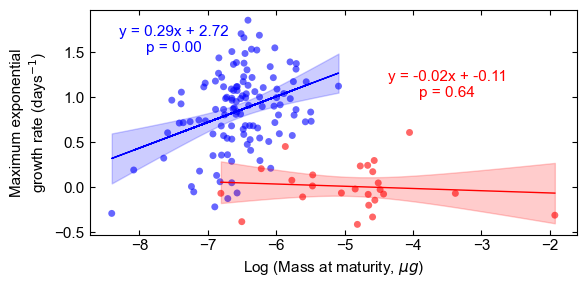

In [19]:
fig = plt.figure(figsize = (6, 3))
# Heterotrophs
plt.scatter(heterotrophs['log_cell_size'], y_hetero, alpha = 0.6, ec = 'none',
            color = 'b', s = 25)
plt.plot(heterotrophs['log_cell_size'],
         (heterotrophs['log_cell_size'] * slope_hetero + intercept_hetero),
         c = 'b', lw = 1, ls = '-')
plt.fill_between(x_hetero_, *zip(*y_pred_hetero.conf_int()),
                 color = 'b', alpha = 0.2)
parameters_hetero = reg_hetero.params
pvalues_hetero = reg_hetero.pvalues
plt.text(-7.5, 1.5, 
         f'y = {parameters_hetero["log_cell_size"]:.2f}x + {parameters_hetero["const"]:.2f}\np = {pvalues_hetero["log_cell_size"]:.2f}',
        ha = 'center',
        color = 'b')

# Autotrophs
plt.scatter(phototrophs['log_cell_size'], y_photo, alpha = 0.6, ec = 'none',
            color = 'r', s = 25)
plt.plot(phototrophs['log_cell_size'],
         (phototrophs['log_cell_size'] * slope_photo + intercept_photo),
         c = 'r', lw = 1, ls = '-')
plt.fill_between(x_photo_, *zip(*y_pred_photo.conf_int()),
                 color = 'r', alpha = 0.2)
parameters_photo = reg_photo.params
pvalues_photo = reg_photo.pvalues
plt.text(-3.5, 1, 
         f'y = {parameters_photo["log_cell_size"]:.2f}x + {parameters_photo["const"]:.2f}\np = {pvalues_photo["log_cell_size"]:.2f}',
        ha = 'center',
        color = 'r')

plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.xlabel('Log (Mass at maturity, $\\mu g$)')
plt.ylabel('Maximum exponential\ngrowth rate (days$^{-1}$)')
plt.savefig('figures/lynch_data_hetero_photo.svg')
plt.show()

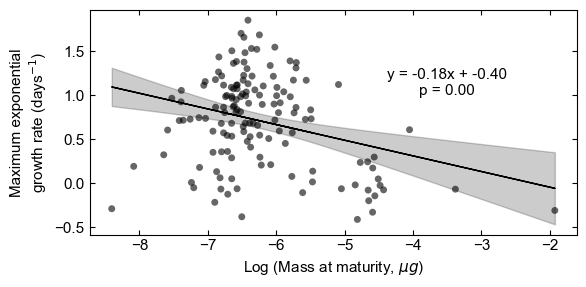

In [20]:
fig = plt.figure(figsize = (6, 3))

# All
plt.scatter(df['log_cell_size'], y, alpha = 0.6, ec = 'none',
            color = 'k', s = 25)
plt.plot(df['log_cell_size'],
         (df['log_cell_size'] * slope + intercept),
         c = 'k', lw = 1, ls = '-')
plt.fill_between(x_, *zip(*y_pred.conf_int()),
                 color = 'k', alpha = 0.2)
parameters = reg.params
pvalues = reg.pvalues
plt.text(-3.5, 1, 
         f'y = {parameters["log_cell_size"]:.2f}x + {parameters["const"]:.2f}\np = {pvalues["log_cell_size"]:.2f}',
        ha = 'center',
        color = 'k')

plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.xlabel('Log (Mass at maturity, $\\mu g$)')
plt.ylabel('Maximum exponential\ngrowth rate (days$^{-1}$)')
plt.savefig('figures/lynch_data_all.svg')
plt.show()

**When autotrophs are added, the relationship between variables changes from positive to negative.**

[DeLong, 2010](https://www.pnas.org/doi/abs/10.1073/pnas.1007783107) was the first to report a positive relationship between cell size (mass) and growth rate. **However, he performed reduced major axis regression to derive his conclussions!** He also claimed that '[phototrophy, chemoautotrophy, and mixotrophy] inclusion does not significantly change the exponent of the scaling relation.'